<div style="text-align: right;"><h4>ФБ-21 Редько-Шпак Родислав, Серяков Владислав</h4></div>
<h1><center><b>Лабораторна робота №2</b></center></h1>
<h3><center>З предмета "Криптографія"</center></h3>
<h5><b><center>Хід роботи:</center></b></h5>

<b>Завдання:</b>
<br>
1) Самостійно підібрати текст для шифрування (2-3 кб) та ключі довжини r = 2, 3, 4, 5, а також довжини 10-20 знаків. Зашифрувати обраний відкритий текст шифром Віженера з цими ключами.<br><br>
2) Підрахувати індекси відповідності для відкритого тексту та всіх одержаних шифртекстів і порівняти їх значення.<br><br>
3) Використовуючи наведені теоретичні відомості, розшифрувати наданий шифртекст (згідно свого варіанта №2). 


Імпорт бібліотек та класів з lab_2_code.py та створення екземплярів

In [72]:
from lab_2_code import *

processor = TextProcessor()
cipher = VigenereCipher()
analyzer = CryptoAnalyzer()
visualizer = Visualizer()
print("Все імпортовано та ініціалізовано!")

Все імпортовано та ініціалізовано!


====================================================================================

<h2><b>Пункт 1</b></h2>

====================================================================================

<h3>Зчитування та підготовка тексту.</h3>

*щодо генерації тексту - ми вирішили використати наступний підхід - ми взяли текст з лабораторної роботи №1. Далі, ми ділимо текст на рандомні за довжиною відрізки тексту, потім також рандомним чином об'єднуємо їх в один текст. Тому виходить доволі випадковий текст, але в той же час який зберігає структуру та частоти появи літер, подібні до оригіналу. Тобто таким чином ми створюємо більш природний (лексичний*?) текст (а не просто ф-ія random).

In [73]:
donor_text = processor.read_text(r'C:\Users\rdk\d_disk\5sem\cryptography\lab_2\v4.0\text_lab_1.txt')
plaintext = processor.generate_random_text(donor_text, 1250)
print(f"[+] Перші 50 символів згенерованого тексту: {plaintext[:50]}...")
print(f"[+] Довжина згенерованого тексту: {len(plaintext)} символів")

[+] Перші 50 символів згенерованого тексту: кийоченьпростозадалследующийвопросактожеэтаасамгри...
[+] Довжина згенерованого тексту: 1250 символів


<h3>Генеруємо ключі шифрування (ф-ія generate_keys) та виконуємо шифрування віженером (ф-ія encrypt).</h3>



*ми створюємо ключі довжиною, 2-5 та 10-20 (за допомогою ф-ії generate_keys) та виводимо їх.*

In [74]:
key_lengths = [2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
keys = processor.generate_keys(key_lengths)
print("\n[+] Згенеровані ключі:")
for i, key in enumerate(keys):
    print(f" [-] Ключ {i+1} (довжина {len(key)}): {key}")


[+] Згенеровані ключі:
 [-] Ключ 1 (довжина 2): ст
 [-] Ключ 2 (довжина 3): ягг
 [-] Ключ 3 (довжина 4): нюаз
 [-] Ключ 4 (довжина 5): дилзф
 [-] Ключ 5 (довжина 10): олчщужгшмй
 [-] Ключ 6 (довжина 11): офякчыхбъхя
 [-] Ключ 7 (довжина 12): беннвлфчгфжо
 [-] Ключ 8 (довжина 13): ъващаьшаюшхши
 [-] Ключ 9 (довжина 14): йуэшщщипебрвжй
 [-] Ключ 10 (довжина 15): ивзхкябчъкзшчхф
 [-] Ключ 11 (довжина 16): ьлйчйьввмпйртяьщ
 [-] Ключ 12 (довжина 17): ящщеъыядшйувэнювж
 [-] Ключ 13 (довжина 18): уциеээрлксэивпдснз
 [-] Ключ 14 (довжина 19): йщумчуыюгдцйижяхьлц
 [-] Ключ 15 (довжина 20): рфеяртгьъжрозлылъхха


====================================================================================

<h2><b>Пункт 2</b></h2>

====================================================================================

<h3> Обчислюємо індекси відповідності (calculate_ioc).</h3>

*індекс відповідності (ioc) в коді рахується для того, щоб визначити, наскільки символи в тексті повторюються між собою. Уявімо, що ми рахуємо кожну літеру в тексті і дивимося, скільки разів вона зустрічається з іншою такою ж літерою. Формула бере кількість кожної літери, множить її на (к-сть - 1) і ділить на загальну кількість можливих пар символів у тексті. Якщо простіше - це показник того, яка ймовірність зустріти однакові літери в тексті. Для звичайного тексту цей показник буде вищим (бо деякі літери, як "о" чи "а", часто повторюються), а для зашифрованого - нижчим (бо там символи розподілені більш випадково).*


[=] Індекси відповідності [=]
 [+] Відкритий текст: 0.0556259408
 [-] Шифротекст 1: 0.0450497998
 [-] Шифротекст 2: 0.0450164932
 [-] Шифротекст 3: 0.0358225781
 [-] Шифротекст 4: 0.0363670136
 [-] Шифротекст 5: 0.0332310649
 [-] Шифротекст 6: 0.0335641313
 [-] Шифротекст 7: 0.0335910328
 [-] Шифротекст 8: 0.0352038431
 [-] Шифротекст 9: 0.0317911930
 [-] Шифротекст 10: 0.0339996797
 [-] Шифротекст 11: 0.0334962370
 [-] Шифротекст 12: 0.0332425941
 [-] Шифротекст 13: 0.0333758207
 [-] Шифротекст 14: 0.0328262610
 [-] Шифротекст 15: 0.0315426741


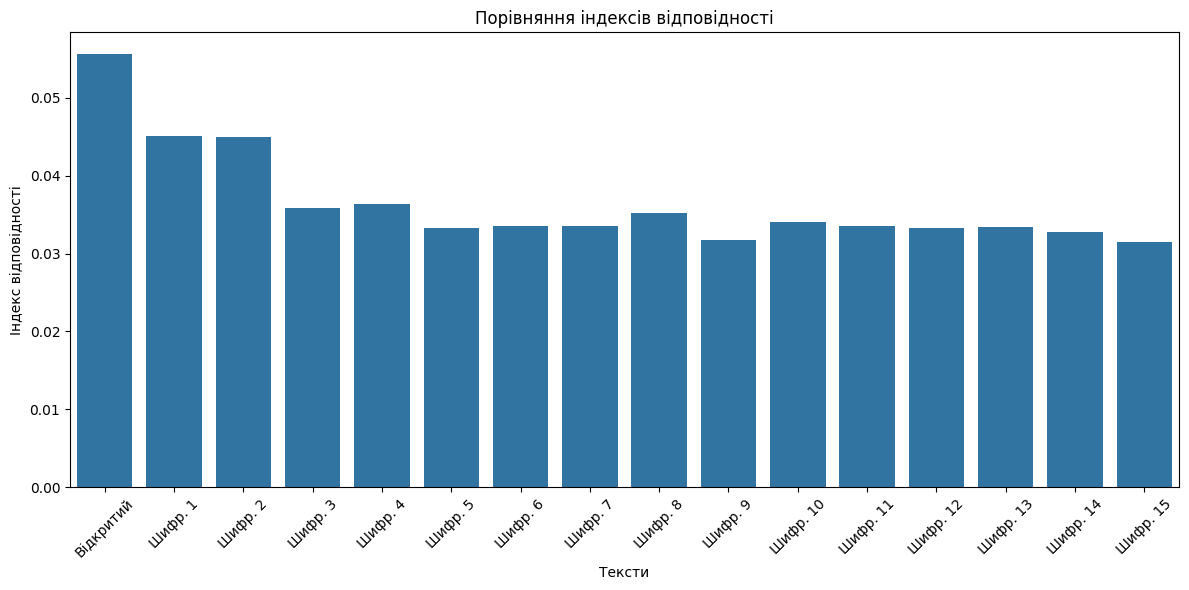

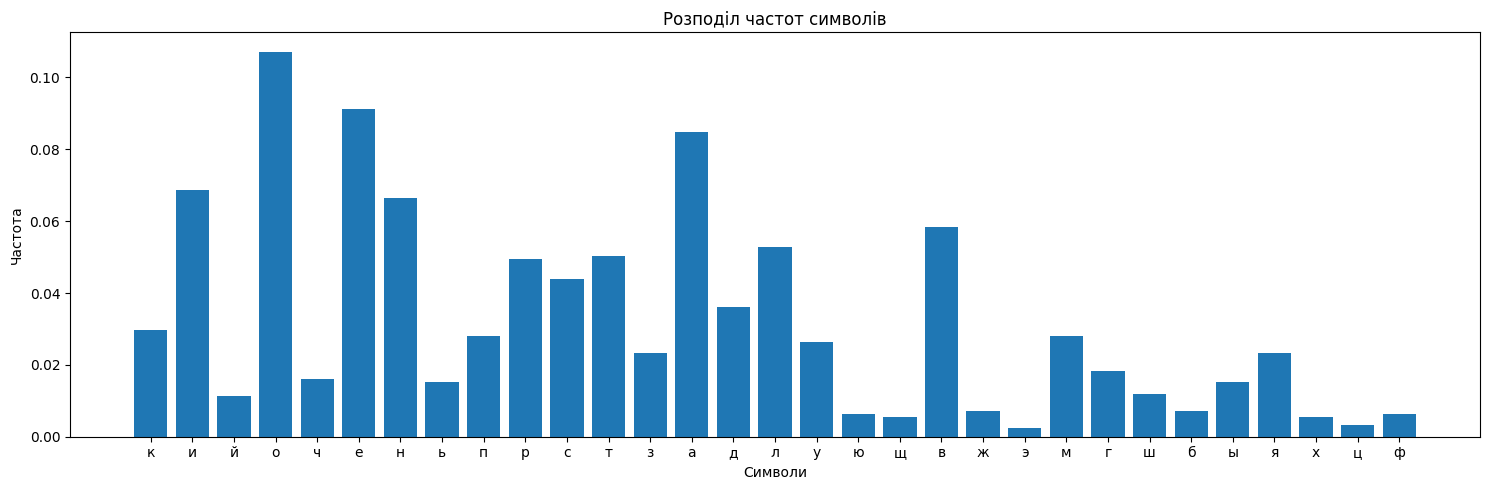

In [75]:
ciphertexts = [cipher.encrypt(plaintext, key) for key in keys]
ioc_plaintext = cipher.calculate_ioc(plaintext)
ioc_ciphertexts = [cipher.calculate_ioc(ciphertext) for ciphertext in ciphertexts]

print("\n[=] Індекси відповідності [=]")
print(f" [+] Відкритий текст: {ioc_plaintext:.10f}")
for i, ioc in enumerate(ioc_ciphertexts):
    print(f" [-] Шифротекст {i+1}: {ioc:.10f}")

# покзуємо результати візуально
visualizer.plot_ioc_comparison(ioc_plaintext, ioc_ciphertexts)
visualizer.plot_frequency_distribution(plaintext)

Як видно з виводу та графіка №1 - індекси відповідності найкращі* для відкритого тексту - 0,057 (це відповідає рос мові), в той час як всі інші зашифровані текст мають менші значення.
З другого графіка видно частоти букв для нашого відкритого тексту - вони також відповідають рос мові.

====================================================================================

<h2><b>Пункт 3</b></h2>

====================================================================================

<h3>Аналіз варіанту (в нашому випадку - №2) та пробуємо розшифрувати.</h3>

*В цій частині ми аналізуємо зашифрований текст (за варіантом, в нашому випадку №2). Для цього ми спочатку намагаємося дізнатися довжину ключа (ф-ія find_key_length), після цього, за знайденою довжиною, знаходимо ключ (ф-ія find_key). В кінці ми дешифруємо наш текст цим ключем (ф-ія decrypt).*

**Як працює find_key_length** - *ми беремо наш зашифрований текст і робимо таку штуку: пробуємо порізати його на відрізки різної довжини (від 1 до 30 символів). Для кожної довжини дивимось на символи через однакові проміжки. Наприклад, якщо думаємо що довжина ключа 3, то беремо: перший символ, четвертий, сьомий... потім другий, п'ятий, восьмий... і так далі. Для кожного такого набору рахуємо індекс відповідності (IOC). Фішка в тому, що коли ми вгадаємо правильну довжину ключа, то в цих наборах будуть символи, зашифровані одним і тим же символом ключа - і IOC буде найбільш схожим на IOC звичайного тексту!*

**Як працює знаходження самого ключа (find_key)** - *коли ми знайшли довжину, починається ще цікавіше. Для кожної позиції в ключі (наприклад, якщо довжина 3, то окремо для першої, другої і третьої позицій):*

<br>Беремо всі символи, які зашифровані цією позицією ключа
<br>Рахуємо частоту кожної літери в цих символах
<br>Пробуємо всі можливі зсуви алфавіту і дивимось, при якому зсуві частоти літер найбільше схожі на частоти в звичайному
<br>російському тексті (які ми знаємо з теорії*)
<br>Той зсув, який дає найкращий збіг - це і є символ ключа на цій позиції.

*до речі, значення природної мови ми взяли з минулої лабораторної роботи. Тільки трохи там підправили алфавіт, щоб він відповідав цій лабораторній та отримали результат.

In [76]:
print("\n[===] Аналіз варіанту №2 [===]")
encrypted_variant = processor.read_text(r'C:\Users\rdk\d_disk\5sem\cryptography\lab_2\v4.0\texts_variants\text_2.txt')
recommended_length, top_key_lengths = analyzer.find_key_length(encrypted_variant)

found_key = analyzer.find_key(encrypted_variant, recommended_length)
decrypted_text = cipher.decrypt(encrypted_variant, found_key)

print(f"\n[+] Знайдений ключ: {found_key}")
print(f"[+] Розшифрований текст (перші 50 символів): {decrypted_text[:50]}...")


[===] Аналіз варіанту №2 [===]

[!] Топ-5 можливих довжин ключа [!]
 [+] Довжина 28: IOC = 0.055361
 [+] Довжина 14: IOC = 0.055283
 [+] Довжина 7: IOC = 0.044625
 [+] Довжина 21: IOC = 0.044470
 [+] Довжина 8: IOC = 0.036423

[✓] Рекомендована довжина ключа: 14

[+] Знайдений ключ: жосвеыдиадозор
[+] Розшифрований текст (перші 50 символів): уакисхчгжтосдефатесшщоъилгесоришоаомьэтогоцесхомъд...


Як ми бачимо з результатів - оптимальна довжина ключа - 14 (за ІОС зверху 28, але в коді є перевірка - він створює "плато" з довжин, які мають IOC близький до макс (більше 90% від макс значення), і потім обирає найменшу довжину з цього плато. ми можемо отримати кратні довжини з дуже схожими IOC, але нам потрібна найменша з них.) По факту, це як найти найменший спільний дільник для числа.

<h3>Додатковий аналіз з іншими довжинами ключа (першим методом) (щоб точно переконатися, що ми обрали оптимальний/правильний ключ).</h3>

In [77]:
additional_results = []
additional_lengths = [length for length, _ in top_key_lengths[:5] if length != recommended_length]

for length in additional_lengths:
    print(f"\n{'=' * 30} Аналіз з довжиною {length} {'=' * 30}")
    key = analyzer.find_key(encrypted_variant, length)
    text = cipher.decrypt(encrypted_variant, key)
    additional_results.append((length, key, text))
    print(f"[+] Ключ: {key}")
    print(f"[+] Текст: {text[:50]}...")


============================== Аналіз з довжиною 28 ==============================
[+] Ключ: жесвиднийдозорпослеызиаделор
[+] Текст: уйкиомогэтосделатьсшцоъифяесощишлчемуэтогонесмомчд...

============================== Аналіз з довжиною 7 ==============================
[+] Ключ: жаиозыр
[+] Текст: уоуьпхлежоосчефоыщпшнръдлгшсоюсммавоьщтоцоцуъйммож...

============================== Аналіз з довжиною 21 ==============================
[+] Ключ: маиееержадоедзжасозыр
[+] Текст: ноуесллежтоуоофотщпшнкъдфеосоюхмочлоьртоцоруътовож...

============================== Аналіз з довжиною 8 ==============================
[+] Ключ: иднзозеи
[+] Текст: скогийцгютпсдохжыгймппхдсжжъжчфтлченоъынйъпмфрояци...


З виводу видно, що ключ з довжиною 28 підходить, але сенс - це по факту подвоєний ключ довжини 14) Інші ключі вже не правильно розшифровують текст.

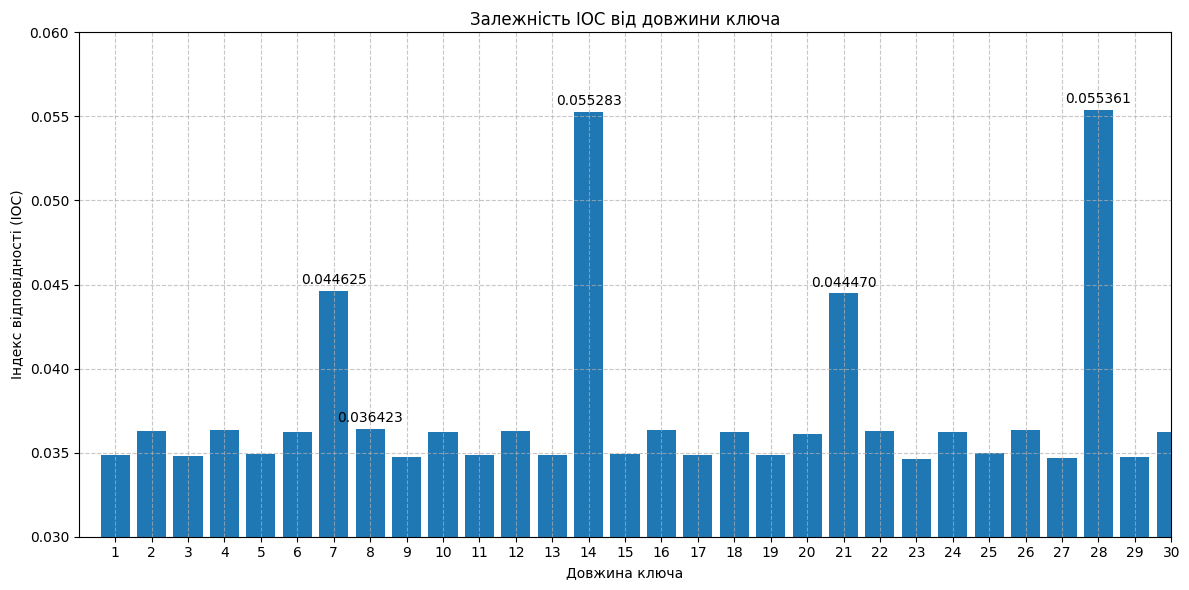

In [78]:
plt.figure(figsize=(12, 6))
x = [length for length, _ in top_key_lengths]
y = [ioc for _, ioc in top_key_lengths]


plt.bar(x, y)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Довжина ключа')
plt.ylabel('Індекс відповідності (IOC)')
plt.title('Залежність IOC від довжини ключа')
plt.xticks(x)

for i in range(len(x[:5])):
    plt.annotate(f'{y[i]:.6f}', 
                 (x[i], y[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center')

plt.ylim(0.03, 0.06)
plt.xlim(0, 30)
plt.tight_layout()
plt.show()


<h3>Загальний аналіз та результати.</h3>

In [79]:
print("\n" + "="*50)
print("Аналіз результатів:")
print("="*50)
print(f"1. Довжина відкритого тексту: {len(plaintext)} символів")
print(f"2. Кількість згенерованих ключів: {len(keys)}")
print("3. Довжини ключів:", ", ".join(map(str, key_lengths)))
print(f"4. Індекс відповідності відкритого тексту: {ioc_plaintext:.6f}")
print("5. Індекси відповідності шифротекстів:")
for i, ioc in enumerate(ioc_ciphertexts):
    print(f" Шифротекст {i+1}: {ioc:.6f}")
print("6. Аналіз можливих довжин ключа:")
print("-"*30)
print("Довжини ключів - топ-5:")
for length, ioc in top_key_lengths[:5]:
    print(f" Довжина {length}: IOC = {ioc:.6f}")
print(f"7. Знайдений ключ для варіанту: {found_key}")
print(f"8. Довжина розшифрованого тексту: {len(decrypted_text)} символів")
print("="*50)


Аналіз результатів:
1. Довжина відкритого тексту: 1250 символів
2. Кількість згенерованих ключів: 15
3. Довжини ключів: 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
4. Індекс відповідності відкритого тексту: 0.055626
5. Індекси відповідності шифротекстів:
 Шифротекст 1: 0.045050
 Шифротекст 2: 0.045016
 Шифротекст 3: 0.035823
 Шифротекст 4: 0.036367
 Шифротекст 5: 0.033231
 Шифротекст 6: 0.033564
 Шифротекст 7: 0.033591
 Шифротекст 8: 0.035204
 Шифротекст 9: 0.031791
 Шифротекст 10: 0.034000
 Шифротекст 11: 0.033496
 Шифротекст 12: 0.033243
 Шифротекст 13: 0.033376
 Шифротекст 14: 0.032826
 Шифротекст 15: 0.031543
6. Аналіз можливих довжин ключа:
------------------------------
Довжини ключів - топ-5:
 Довжина 28: IOC = 0.055361
 Довжина 14: IOC = 0.055283
 Довжина 7: IOC = 0.044625
 Довжина 21: IOC = 0.044470
 Довжина 8: IOC = 0.036423
7. Знайдений ключ для варіанту: жосвеыдиадозор
8. Довжина розшифрованого тексту: 7328 символів


<h2><b>Висновки</b></h2>

У ході лабораторної роботи досліджено принципи роботи та методи криптоаналізу шифру Віженера. 
<br>Знайдений індекс відповідності (IOC) для відкритого тексту російською мовою становить приблизно 0.056 - відповідає теоретичним очікуванням рос мови. 
<br>Зі збільшенням довжини ключа значення IOC зменшується: для ключів довжиною 2–5 символів - близько 0.040–0.045, а для ключів довжиною 10–20 символів - 0.032–0.034. 
<br>Для зашифрованого тексту варіанту №2 найвірогіднішою виявилася довжина 14 та був знайдений ключ - "последнийдозор" (+ це підтвердилося успішним розшифруванням). 

Отримані результати підтверджують теоретичні відомості про вразливість шифру Віженера до частотного криптоаналізу та демонструють практичну можливість його зламу (особливо для коротких ключів (2–5 символів)) при наявності достатньої кількості шифротексту.